# South African Language Identification
**EDSA 2021 Classification Hackathon**

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

South Africa is a multiethnic country known for its extensive language diversity. The power of language to advance democracy and improve the social, cultural, intellectual, economic, and political spheres of South African society makes it an essential weapon.

There are 11 official languages in the nation, all of which are given equal recognition. The majority of South Africans speak two or more of the official languages and are multilingual.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/> 

With such a multilingual population, it is only obvious that the South African systems and devices should also be able to communicate in multi-languages.

As a result, I'll be developing a machine learning model that can recognize the language of any text written in one of South Africa's 11 official languages. The model's objective is to identify the natural language used in a piece of text.

### 1.2 Problem Statement
Given the linguistic diversity of South African society, having a model that can accurately translate any piece of text into the target natural language will go a long way in bridging the communication gap in any of her systems, encouraging inclusion and diversity, and ultimately enhanced productivity.

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

We will import libraries in this section, which are collections of modules organized into classes and depending on functionality. We will need these things for this analysis and modeling:

- For Data Manupulation the libraries such as Pandas, Numpy etc.
   
- For Data Visualization, libraries such as mathplotlib, seaborn`
    
- libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

.

In [67]:

import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB


# Accuracy Scores
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Data Cleaning
import emoji
from bs4 import BeautifulSoup
import re
import itertools
import string

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>
The NCHLT Text Corpora compiled by the South African Department of Arts and Culture & Centre for Text Technology served as the dataset for this challenge (CTexT, North-West University, South Africa). Praekelt performed further cleaning, which enhanced the training set.

Language ID and Text make up the data. The text has many levels of cleanliness. To clean up the data, several NLP methods will be required.

In [68]:
# Load Data
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [69]:
train_data = train.copy()

In [70]:
# View Dataset
train_data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


## <a id="five"></a>
## 4. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

We're getting our data cleaned uo

In [71]:
# View Data
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
train['text'].head(5)

C:\Users\Hp\AppData\Local\Temp/ipykernel_15264/1090204867.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)      # set to display full text in df


0    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                            
1    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo            
2    the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3    o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la

In [72]:
# Listing languages 
language_list = list(train_data.lang_id.unique())
print(language_list)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [73]:
#Lemmatizing words
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def word_lemma(words, lemmatizer):
    
    lemma = [lemmatizer.lemmatize(word) for word in words]
    return ''.join([l for l in lemma])

#### Remove punctuations

In [74]:
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

#### Clean the data

In [75]:
def cleaning(text):    
    
    #Lower case
    text = text .lower()
    #Removal of Punctuation
    text = remove_punctuation_numbers(text)
    text = word_lemma(text, lemmatizer)
    return text

In [76]:
train_data['processed_text'] = train_data['text'].apply(cleaning)

In [77]:
train_data.head()

,lang_id,text,processed_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [78]:
#cleaning the data

def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

## 5.  Exploratory Data Analysis

This entails examining trends in our data, identifying any instances of data corruption, and highlighting the correlations between various variables. Data visualizations and descriptive statistics are part of this phase.

Let's go on to performing some EDA on our train dataset now.

####  Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


All of the features in our dataset appear to have "Zero Non-Null" values and are only available in "Object" form. Let's confirm the number of null values that are present for each feature.

In [81]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

This Confirms; `No Missing Values in our Dataset`

####  Distribution Visualization

Using the number of data samples we have for each of the several language IDs, let's visualize the distribution of our target response within our training data set.

In [82]:
# We view the count of observations per lan_id
train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

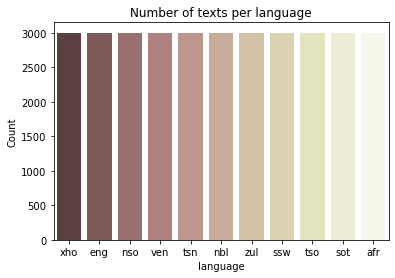

In [83]:
sns.countplot(x='lang_id' ,data = train_data, palette='pink')
plt.ylabel('Count')
plt.xlabel('language')
plt.title('Number of texts per language')

plt.show()

## Splitting the Data

In [86]:
# Set the X and y variables to contain the feature ('text' column) and label ('lang_id' column), respectively.
x = train['text']
y = train['lang_id']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data['processed_text'], train_data["lang_id"], test_size = 0.2, random_state = 42)
print("Training set size is:", x_train.shape)
print("Testing set size is:", x_test.shape)

Training set size is: (26400,)
Testing set size is: (6600,)


### hyperparameter tunining

'Give top priority to the variables that have the biggest impact on our model. (For instance, n-estimators for random forest, n-neighbors for KNN, etc.)'
- `Create a GridSearchCV class object and give it the arguments.`
- `Insert the practice set into the target.`
- `Utilize this object to fit your classifier's training set.`

In [88]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer()
vectorizer = TfidfVectorizer(ngram_range = (5,5), analyzer = 'char')

In [89]:
from sklearn.pipeline import Pipeline
# Creating a pipeline for the gridsearch
pipe = Pipeline([('vectorizer', vectorizer), 
                 ('NB', MultinomialNB(alpha=1.0))])

In [90]:
# Fiting data model
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(5, 5))),
                ('NB', MultinomialNB())])

In [91]:
# predicting the fit on validation set
y_pred = pipe.predict(x_test)

In [92]:
f1 = f1_score(y_test, y_pred, average= 'weighted')

In [93]:
f1

0.9995454573156426

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, y_pred, target_names= language_list))

              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nso       1.00      1.00      1.00       583
         ven       1.00      1.00      1.00       625
         tsn       1.00      1.00      1.00       618
         nbl       1.00      1.00      1.00       584
         zul       1.00      1.00      1.00       598
         ssw       1.00      1.00      1.00       561
         tso       1.00      1.00      1.00       634
         sot       1.00      1.00      1.00       609
         afr       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [96]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, y_pred), 2) * 100}''%')

Accuracy Score: 100.0%


## Predictions

In [97]:
test['processed_text'] = test['text'].apply(cleaning)

In [98]:
test.head()

,index,text,processed_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo.",mmasepala fa maemo a a kgethegileng a letlelela kgato eo
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.,kube inja nelikati betingevakala kutsi titsini naticocisana
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


In [99]:
drop_features(['text'],test)

In [100]:
predictions = pipe.predict(test['processed_text'])

In [101]:
end_result = pd.DataFrame({'index':test['index'],'lang_id':predictions})
end_result.to_csv('submission.csv',index=False)

In [102]:
end_result.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
